<a href="https://colab.research.google.com/github/noahgift/model-explainability/blob/main/model_explainability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict a winning team

## Ingest

In [3]:
import pandas as pd

player_data = "https://raw.githubusercontent.com/noahgift/socialpowernba/\
master/data/nba_2017_players_with_salary_wiki_twitter.csv"
df = pd.read_csv(player_data)
df.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,0.343,7.7,16.8,0.459,0.476,8.8,10.4,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6,OKC,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,0.347,5.1,9.6,0.530,0.525,9.2,10.9,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1,HOU,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,0.299,9.7,18.6,0.524,0.518,6.9,8.6,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0,NO,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,0.361,7.2,14.8,0.483,0.498,7.2,9.3,0.772,2.1,8.9,11.0,4.6,1.4,1.3,3.7,3.9,27.0,NO/SAC,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,0.370,6.0,12.1,0.492,0.516,6.5,7.3,0.895,0.6,4.3,4.9,5.9,0.9,0.3,2.6,2.0,27.0,POR,75,35.9,4.63,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


## Feature Engineering: Create a new Feature...Winning Season

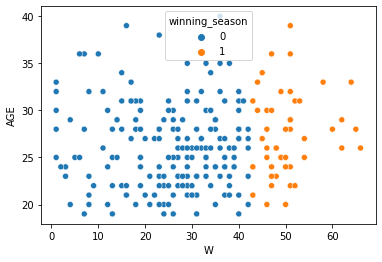

In [4]:
def winning_season(wins):
  
  if wins > 42:
      return 1
  return 0

df["winning_season"] = df["W"].apply(winning_season)

import seaborn as sns
sns.scatterplot(x="W", y="AGE", hue="winning_season", data=df)

## Modeling

In [7]:
df2 = df[["AGE", "POINTS", "SALARY_MILLIONS", "PAGEVIEWS", 
          "TWITTER_FAVORITE_COUNT","winning_season", "TOV"]]
df = df2.dropna()
target = df["winning_season"]
features = df[["AGE", "POINTS","SALARY_MILLIONS", "PAGEVIEWS", 
               "TWITTER_FAVORITE_COUNT", "TOV"]]
classes = ["winning", "losing"]

In [6]:
df2.shape

(239, 7)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.25, 
                                                    random_state=0)

In [9]:
x_train.shape

(177, 6)

Use Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Model Explainability

### Using SHAP

In [16]:
!pip install -q  shap

     |████████████████████████████████| 358kB 3.0MB/s 
